In [10]:
import pandas as pd

In [12]:
import squarify
from pywaffle import Waffle
import matplotlib.pyplot as plt
import requests

headers = {
    'X-CMC_PRO_API_KEY': 'f14d06bc-09cf-4557-89cd-2d8f3fbb9db4',
    'Accepts': 'application/json'
}
params = {
    'start': '1',
    'limit': '10',
    'convert': 'USD'
}
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
def readData():
    json= requests.get(url, params=params, headers=headers).json()


    print(json)
    coins =json['data']
    return coins
def makeGraph(data):
    #preparing data
    dataPlot={}
    sizes=[]
    for x in data:
        name=x['slug']
        volume = x['quote']['USD']['volume_24h']
        sizes.append(volume)
        actPrice = x['quote']['USD']['price']

        print(name," volume: ",volume)
        dataPlot.update({name: volume})
    print(dataPlot)
    labels = [f"{k} ({round(v / sum(dataPlot.values()) * 100, 2)}%)" for k, v in dataPlot.items()]
    plt.figure(figsize=(32, 18), dpi=80)
    squarify.plot(sizes, label=labels,alpha=.8)

    plt.axis('off')
    plt.show()
    fig = plt.figure(
        figsize=(16,9), dpi=80,alpha=.8,
        FigureClass=Waffle,
        rows=10,
        columns=11,
        values=dataPlot,
        rounding_rule='nearest',
        plot_anchor='S',
        title={
            'label': 'Udział kryptowalut na rynku po 24h obrotu',
            'loc': 'left',
            'fontdict': {
                'fontsize': 20
            }
        },
        labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}

    )
    fig.set_facecolor('#DDDDDD')
    plt.show()

{'status': {'timestamp': '2022-05-30T23:51:56.402Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 10046}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9472, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

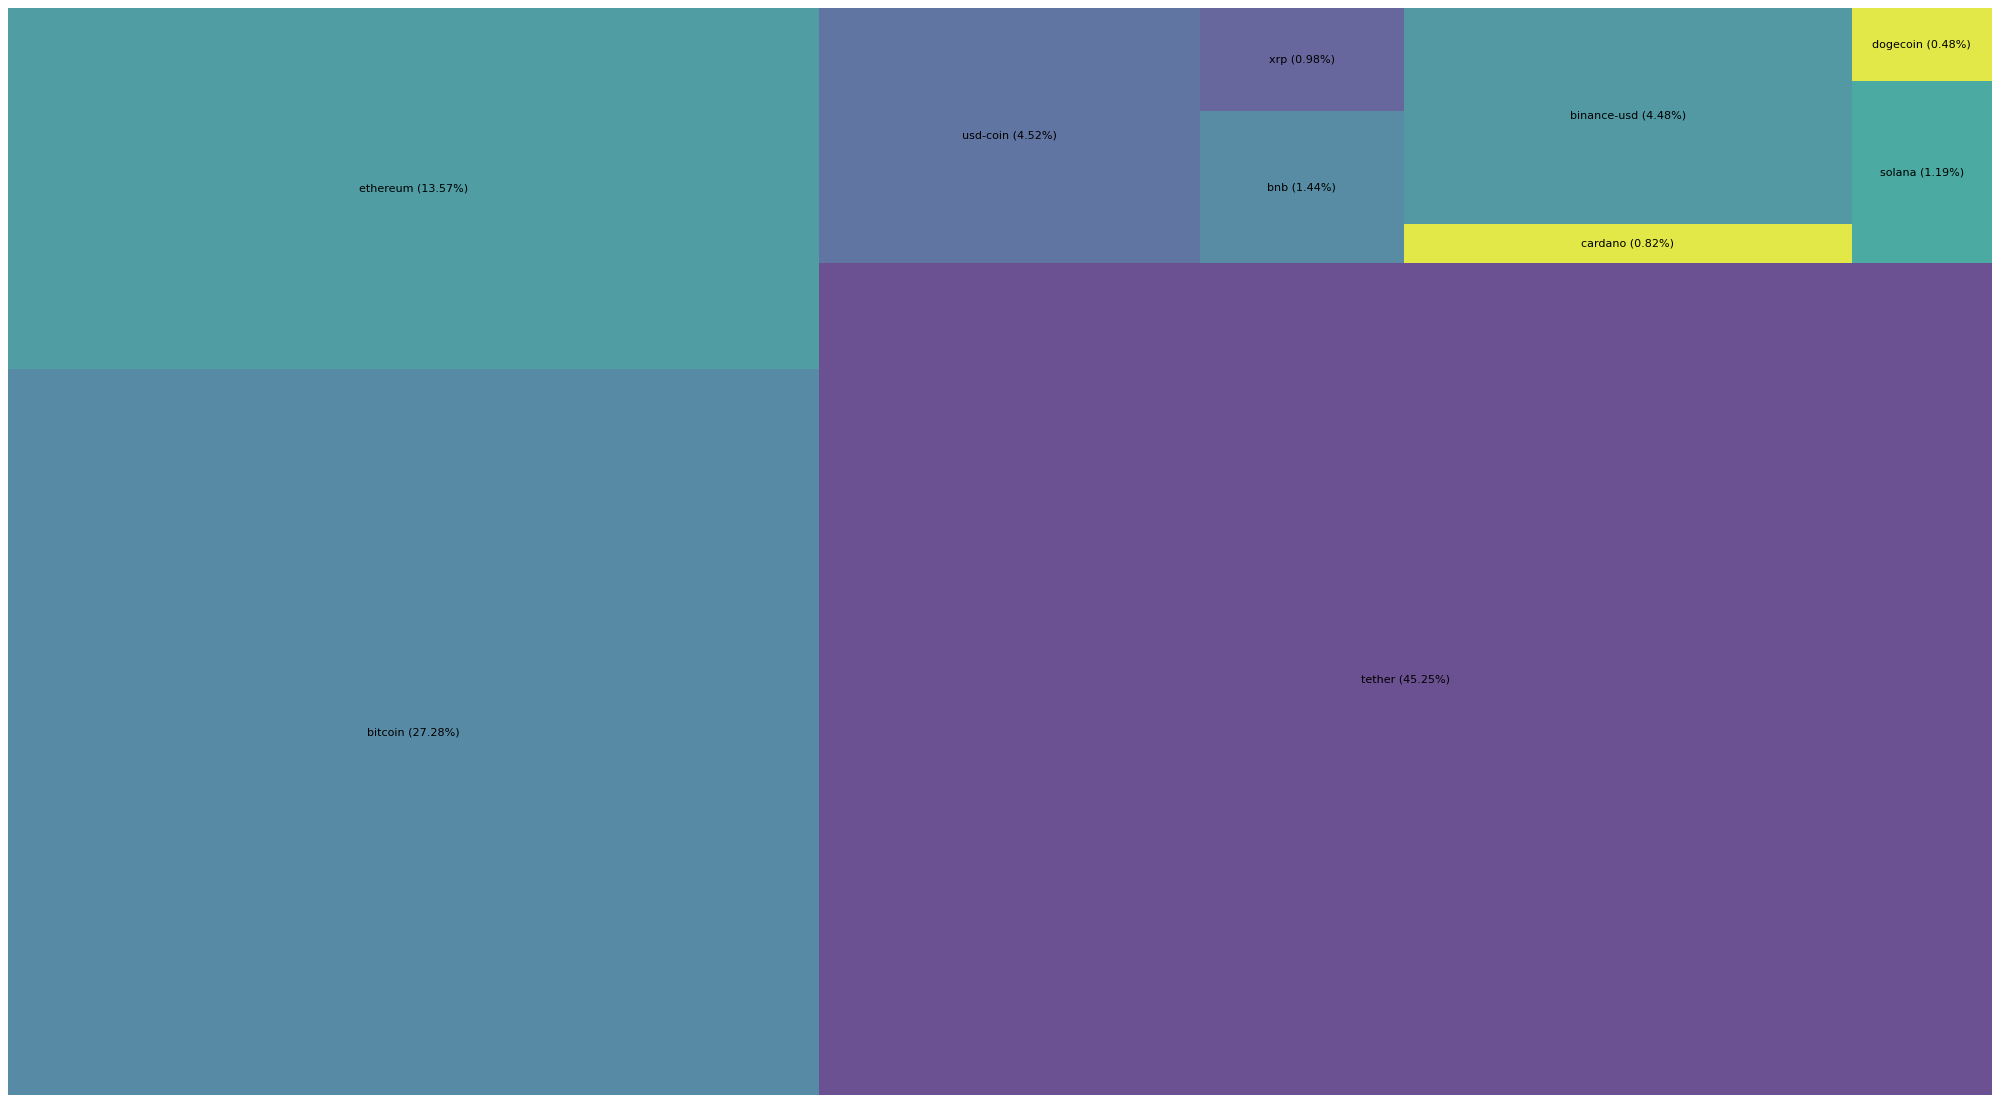

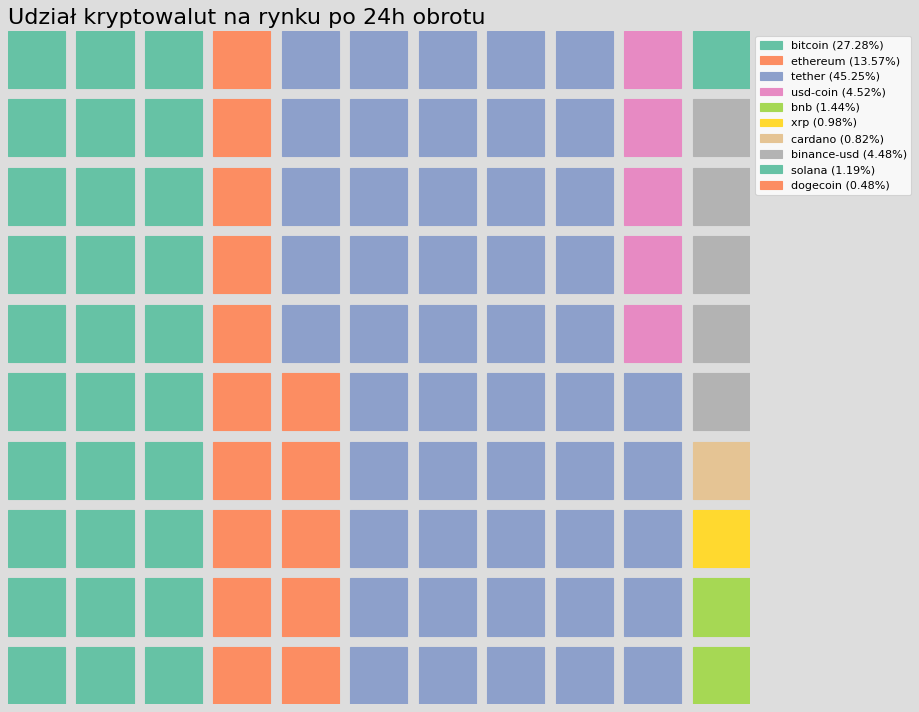

In [13]:
data=readData()
makeGraph(data)

In [14]:
#wczytywanie danych z historii bitcoina
#TODO miejsce na dodanie wczytywania wykresów z poprzednich dat- użyjemy do tego baz danych z kaggli
columnListBTC=["Currency","Date","Volume"]
bitCoinPrice= pd.read_csv('consolidated_coin_data.csv',usecols=columnListBTC)
bitCoinPrice['Date']=pd.to_datetime(bitCoinPrice['Date'])



In [ ]:
#wprowadzamy date z której chcemy wykres